
## Extraction with non-negative matrix factorization and Latent Dirichlet Allocation (LDA)


In [31]:

import matplotlib.pyplot as plt

from time import time
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation, MiniBatchNMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [32]:

def display(to_display):
    print()
    print(to_display)
    print()

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic { topic_idx +1 }', fontdict={ 'fontsize': 30 })
        ax.tick_params(axis='both', which='major', labelsize=20)
        
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
            
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


In [33]:

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = 'nndsvda'



## Dataset


In [34]:

display(' > Loading dataset...')

t0 = time()

data, _ = fetch_20newsgroups(
    
    shuffle=True,
    random_state=1,
    remove=('headers', 'footers', 'quotes'),
    return_X_y=True
    
)

data_samples = data[:n_samples]

display(' > Done in %0.3fs.' % (time() - t0))



 > Loading dataset...


 > Done in 0.954s.




## Use tf-idf features for NMF


In [35]:

display(' > Extracting tf-idf features for NMF...')

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words='english'
)

t0 = time()

tfidf = tfidf_vectorizer.fit_transform(data_samples)

display(' > Done in %0.3fs.' % (time() - t0))



 > Extracting tf-idf features for NMF...


 > Done in 0.264s.




## Use tf (raw term count) features for LDA


In [36]:

display(' > Extracting tf features for LDA...')

tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words='english'
)

t0 = time()

tf = tf_vectorizer.fit_transform(data_samples)

display(' > Done in %0.3fs.' % (time() - t0))



 > Extracting tf features for LDA...


 > Done in 0.258s.




## Fit the NMF model (Frobenius norm)



 > Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...


 > Done in 0.112s.



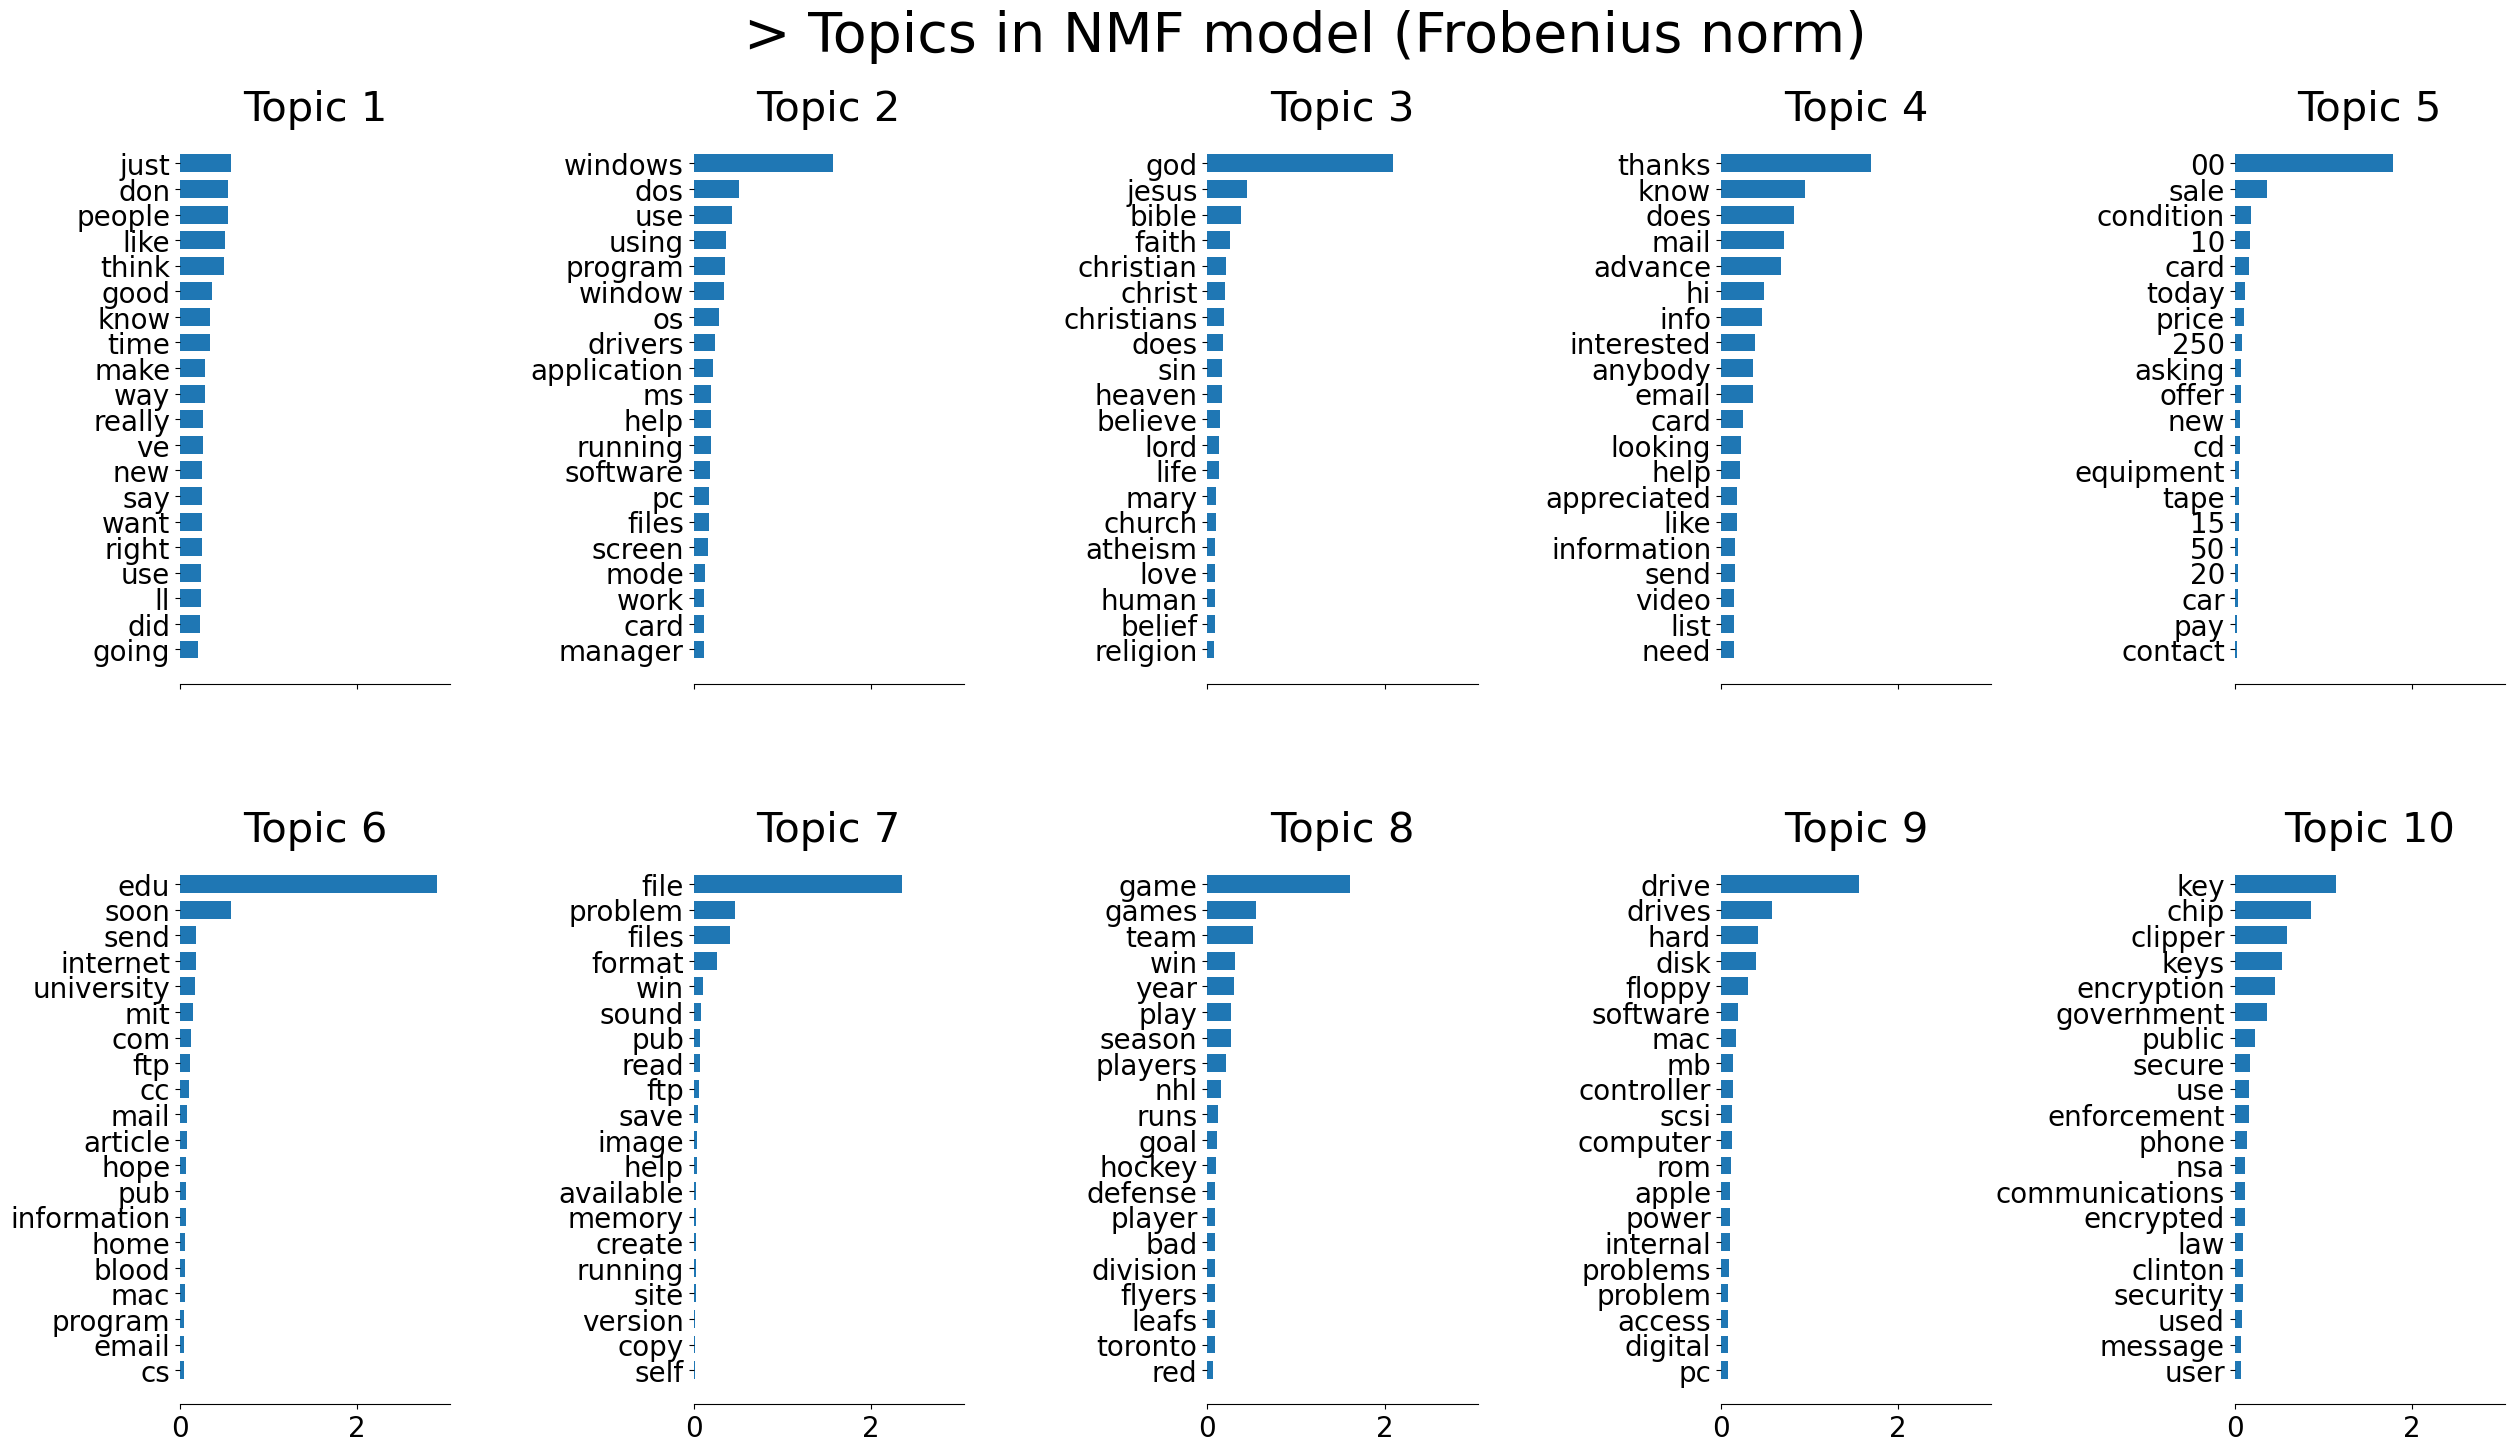

In [37]:

display(
    
    ' > Fitting the NMF model (Frobenius norm) with tf-idf features,'
    'n_samples=%d and n_features=%d...' % (n_samples, n_features)
    
)

t0 = time()

nmf = NMF(
    
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss='frobenius',
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1
    
).fit(tfidf)

display(' > Done in %0.3fs.' % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# display plots
plot_top_words(
    
    nmf, 
    tfidf_feature_names, 
    n_top_words, 
    '> Topics in NMF model (Frobenius norm)'

)



## Fit the NMF model (generalized Kullback-Leibler divergence)



 > Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


 > Done in 1.070s.



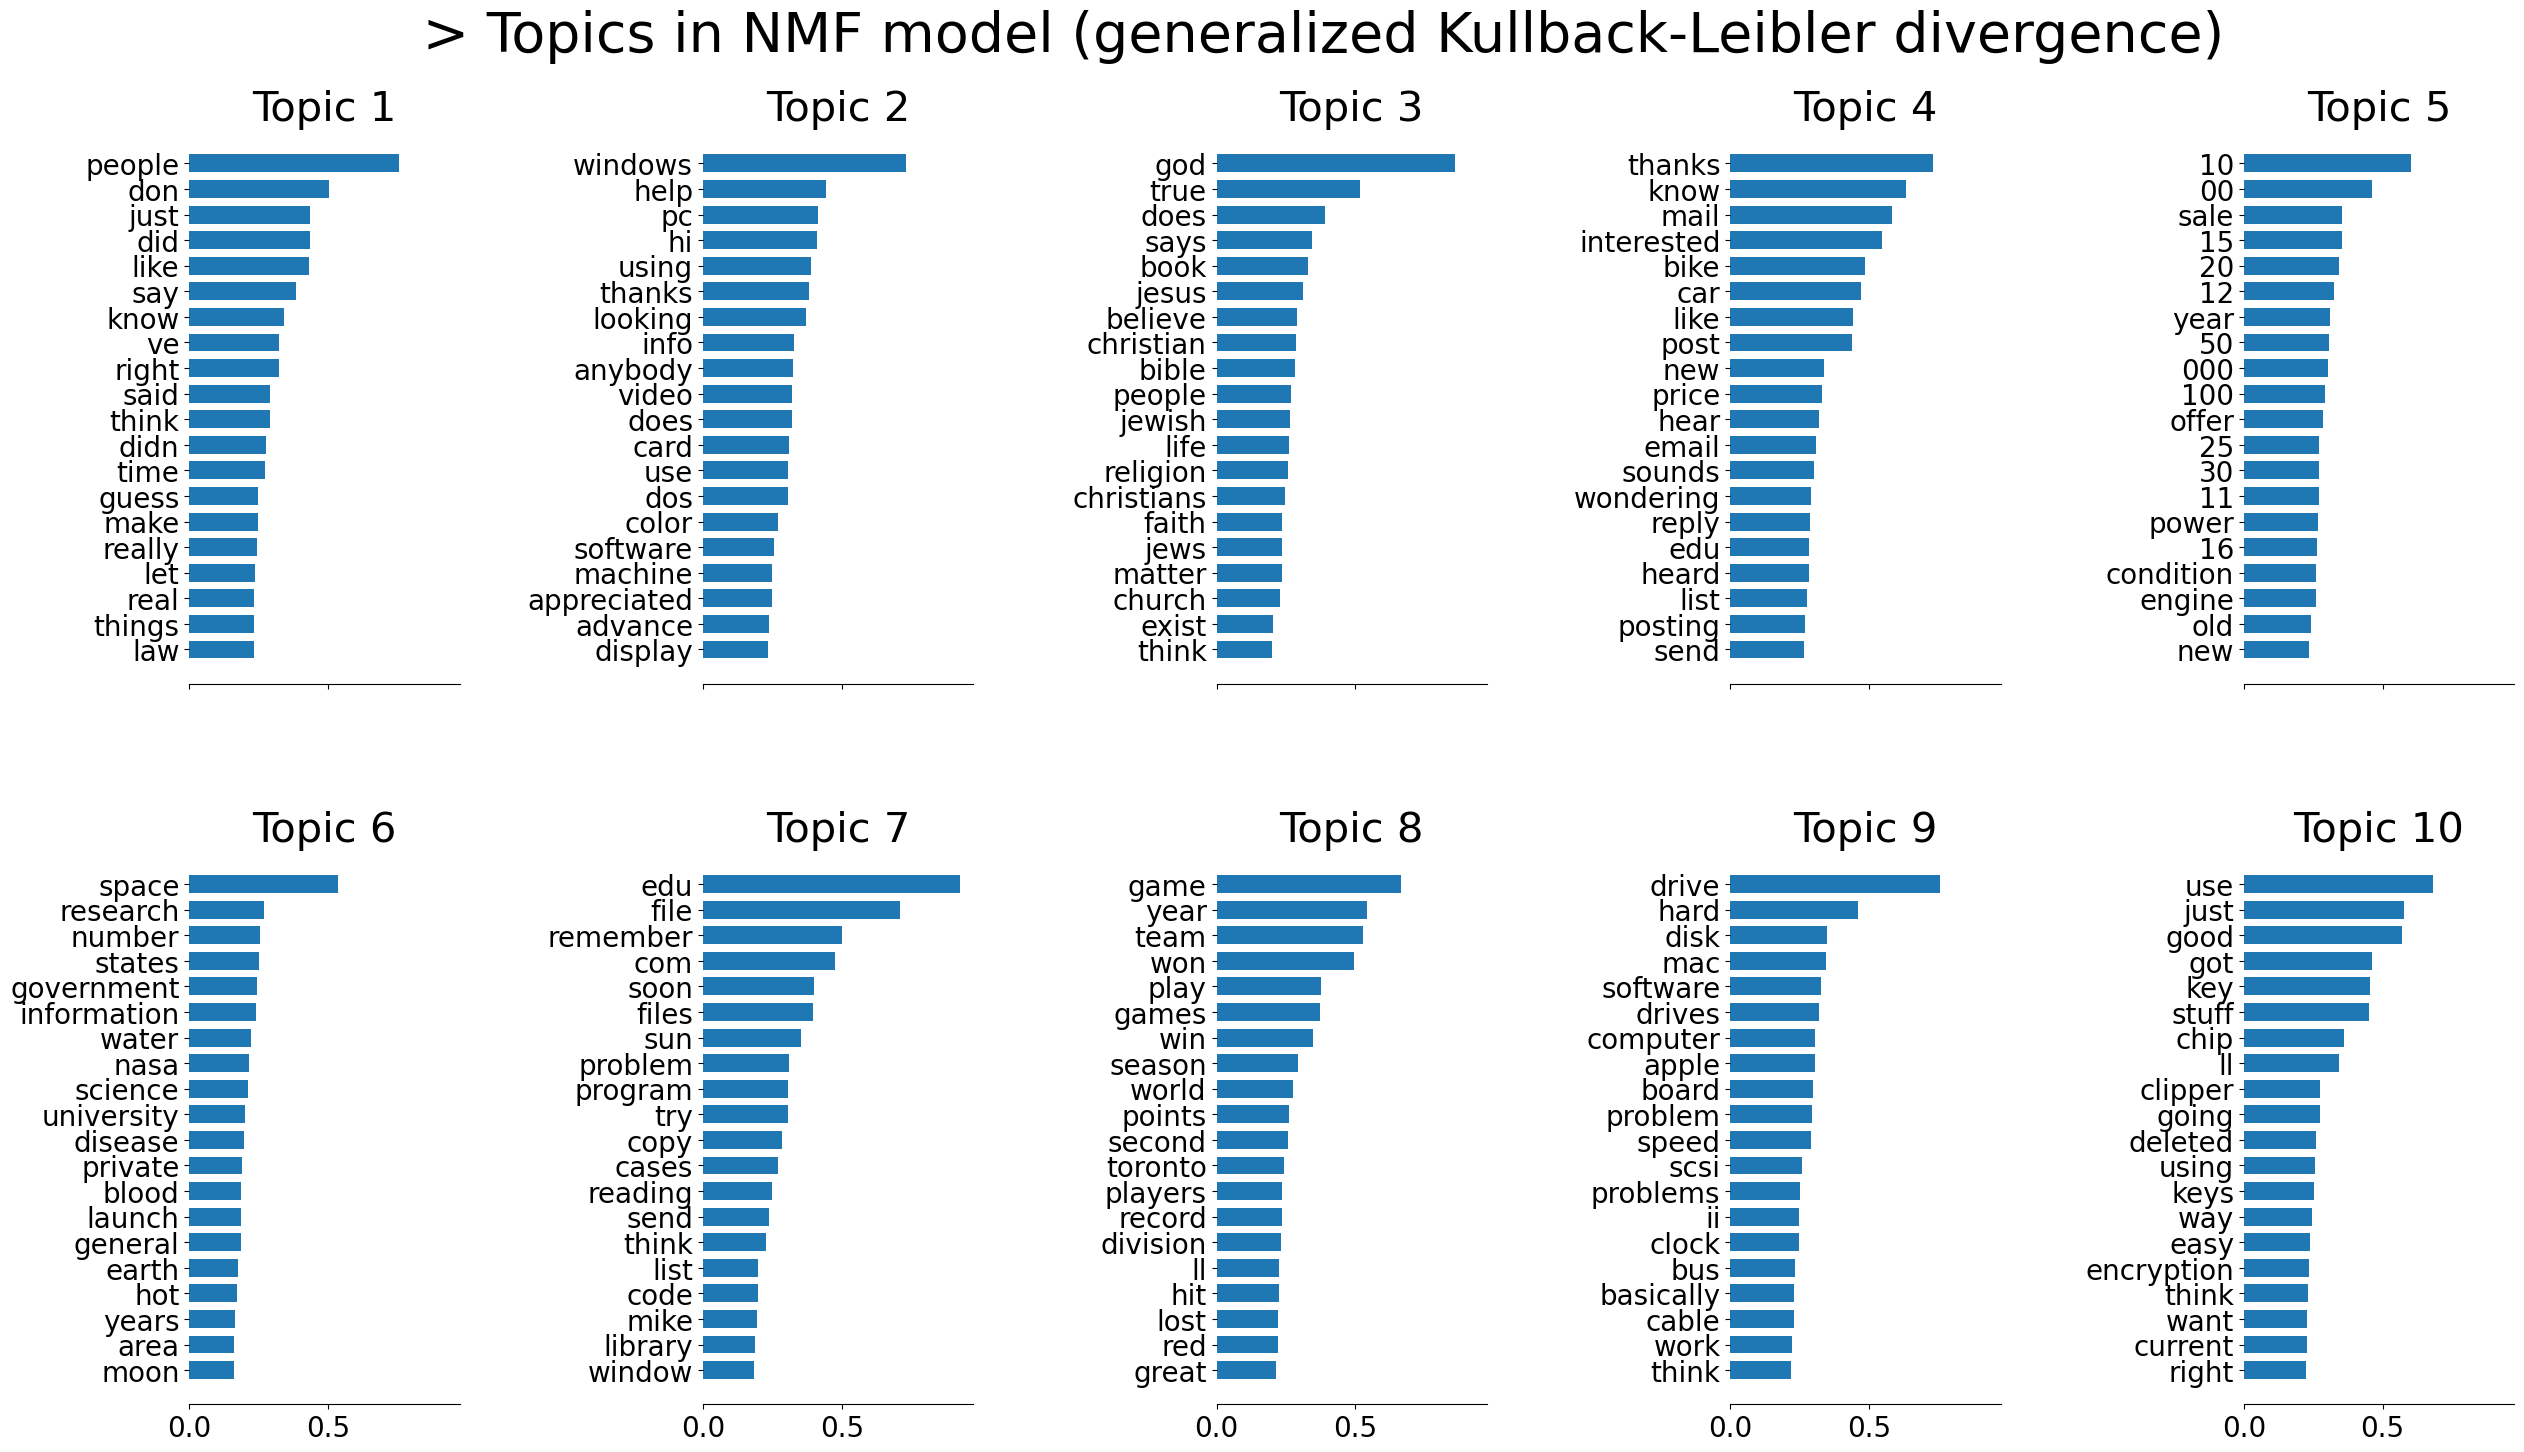

In [38]:

display(
    
    ' > Fitting the NMF model (generalized Kullback-Leibler '
    'divergence) with tf-idf features, n_samples=%d and n_features=%d...'
    % (n_samples, n_features)
    
)

t0 = time()

nmf = NMF(
    
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss='kullback-leibler',
    solver='mu',
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5
    
).fit(tfidf)

display(' > Done in %0.3fs.' % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# display plots
plot_top_words(
    
    nmf,
    tfidf_feature_names,
    n_top_words,
    ' > Topics in NMF model (generalized Kullback-Leibler divergence)'
    
)



## Fit the MiniBatchNMF model (Frobenius norm)



 > Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...


 > Done in 0.107s.



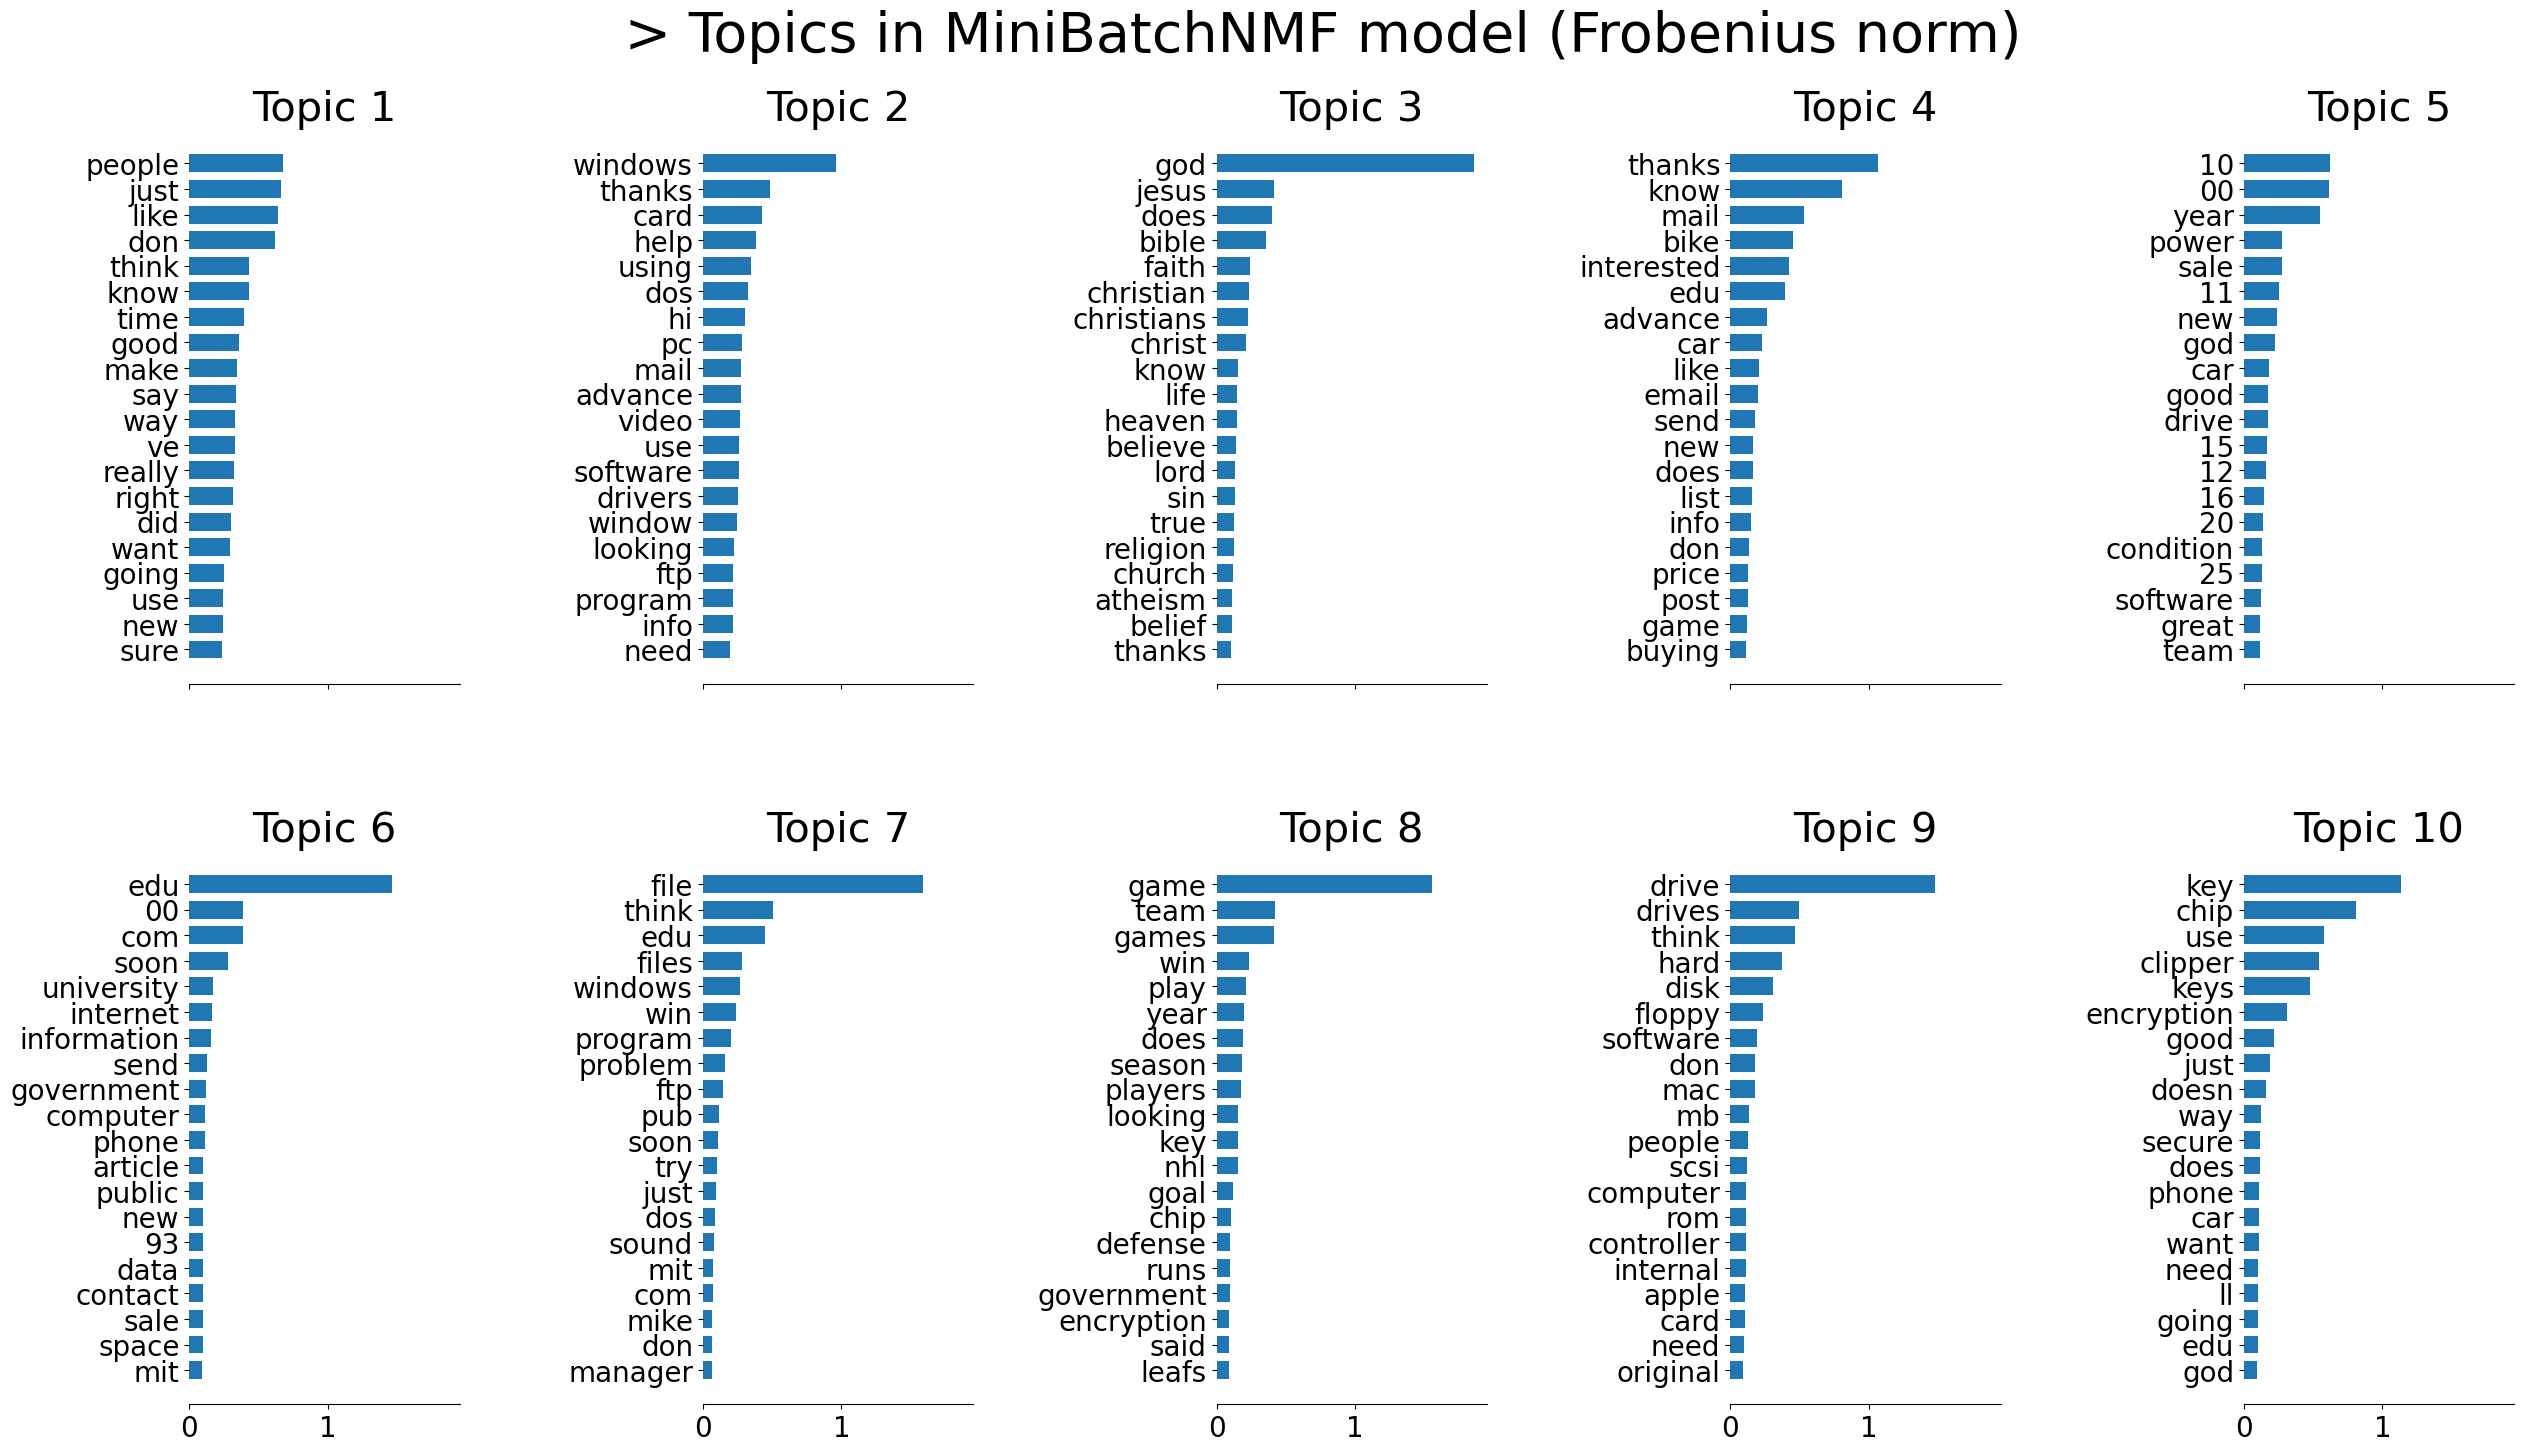

In [39]:

display(
    
    ' > Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf '
    'features, n_samples=%d and n_features=%d, batch_size=%d...'
    % (n_samples, n_features, batch_size)
    
)

t0 = time()

mbnmf = MiniBatchNMF(
    
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss='frobenius',
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5
    
).fit(tfidf)

display(' > Done in %0.3fs.' % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# display plots
plot_top_words(
    
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    ' > Topics in MiniBatchNMF model (Frobenius norm)'
    
)



## Fit the MiniBatchNMF model (generalized Kullback-Leibler divergence)



 > Fitting the MiniBatchNMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...


 > Done in 0.434s.



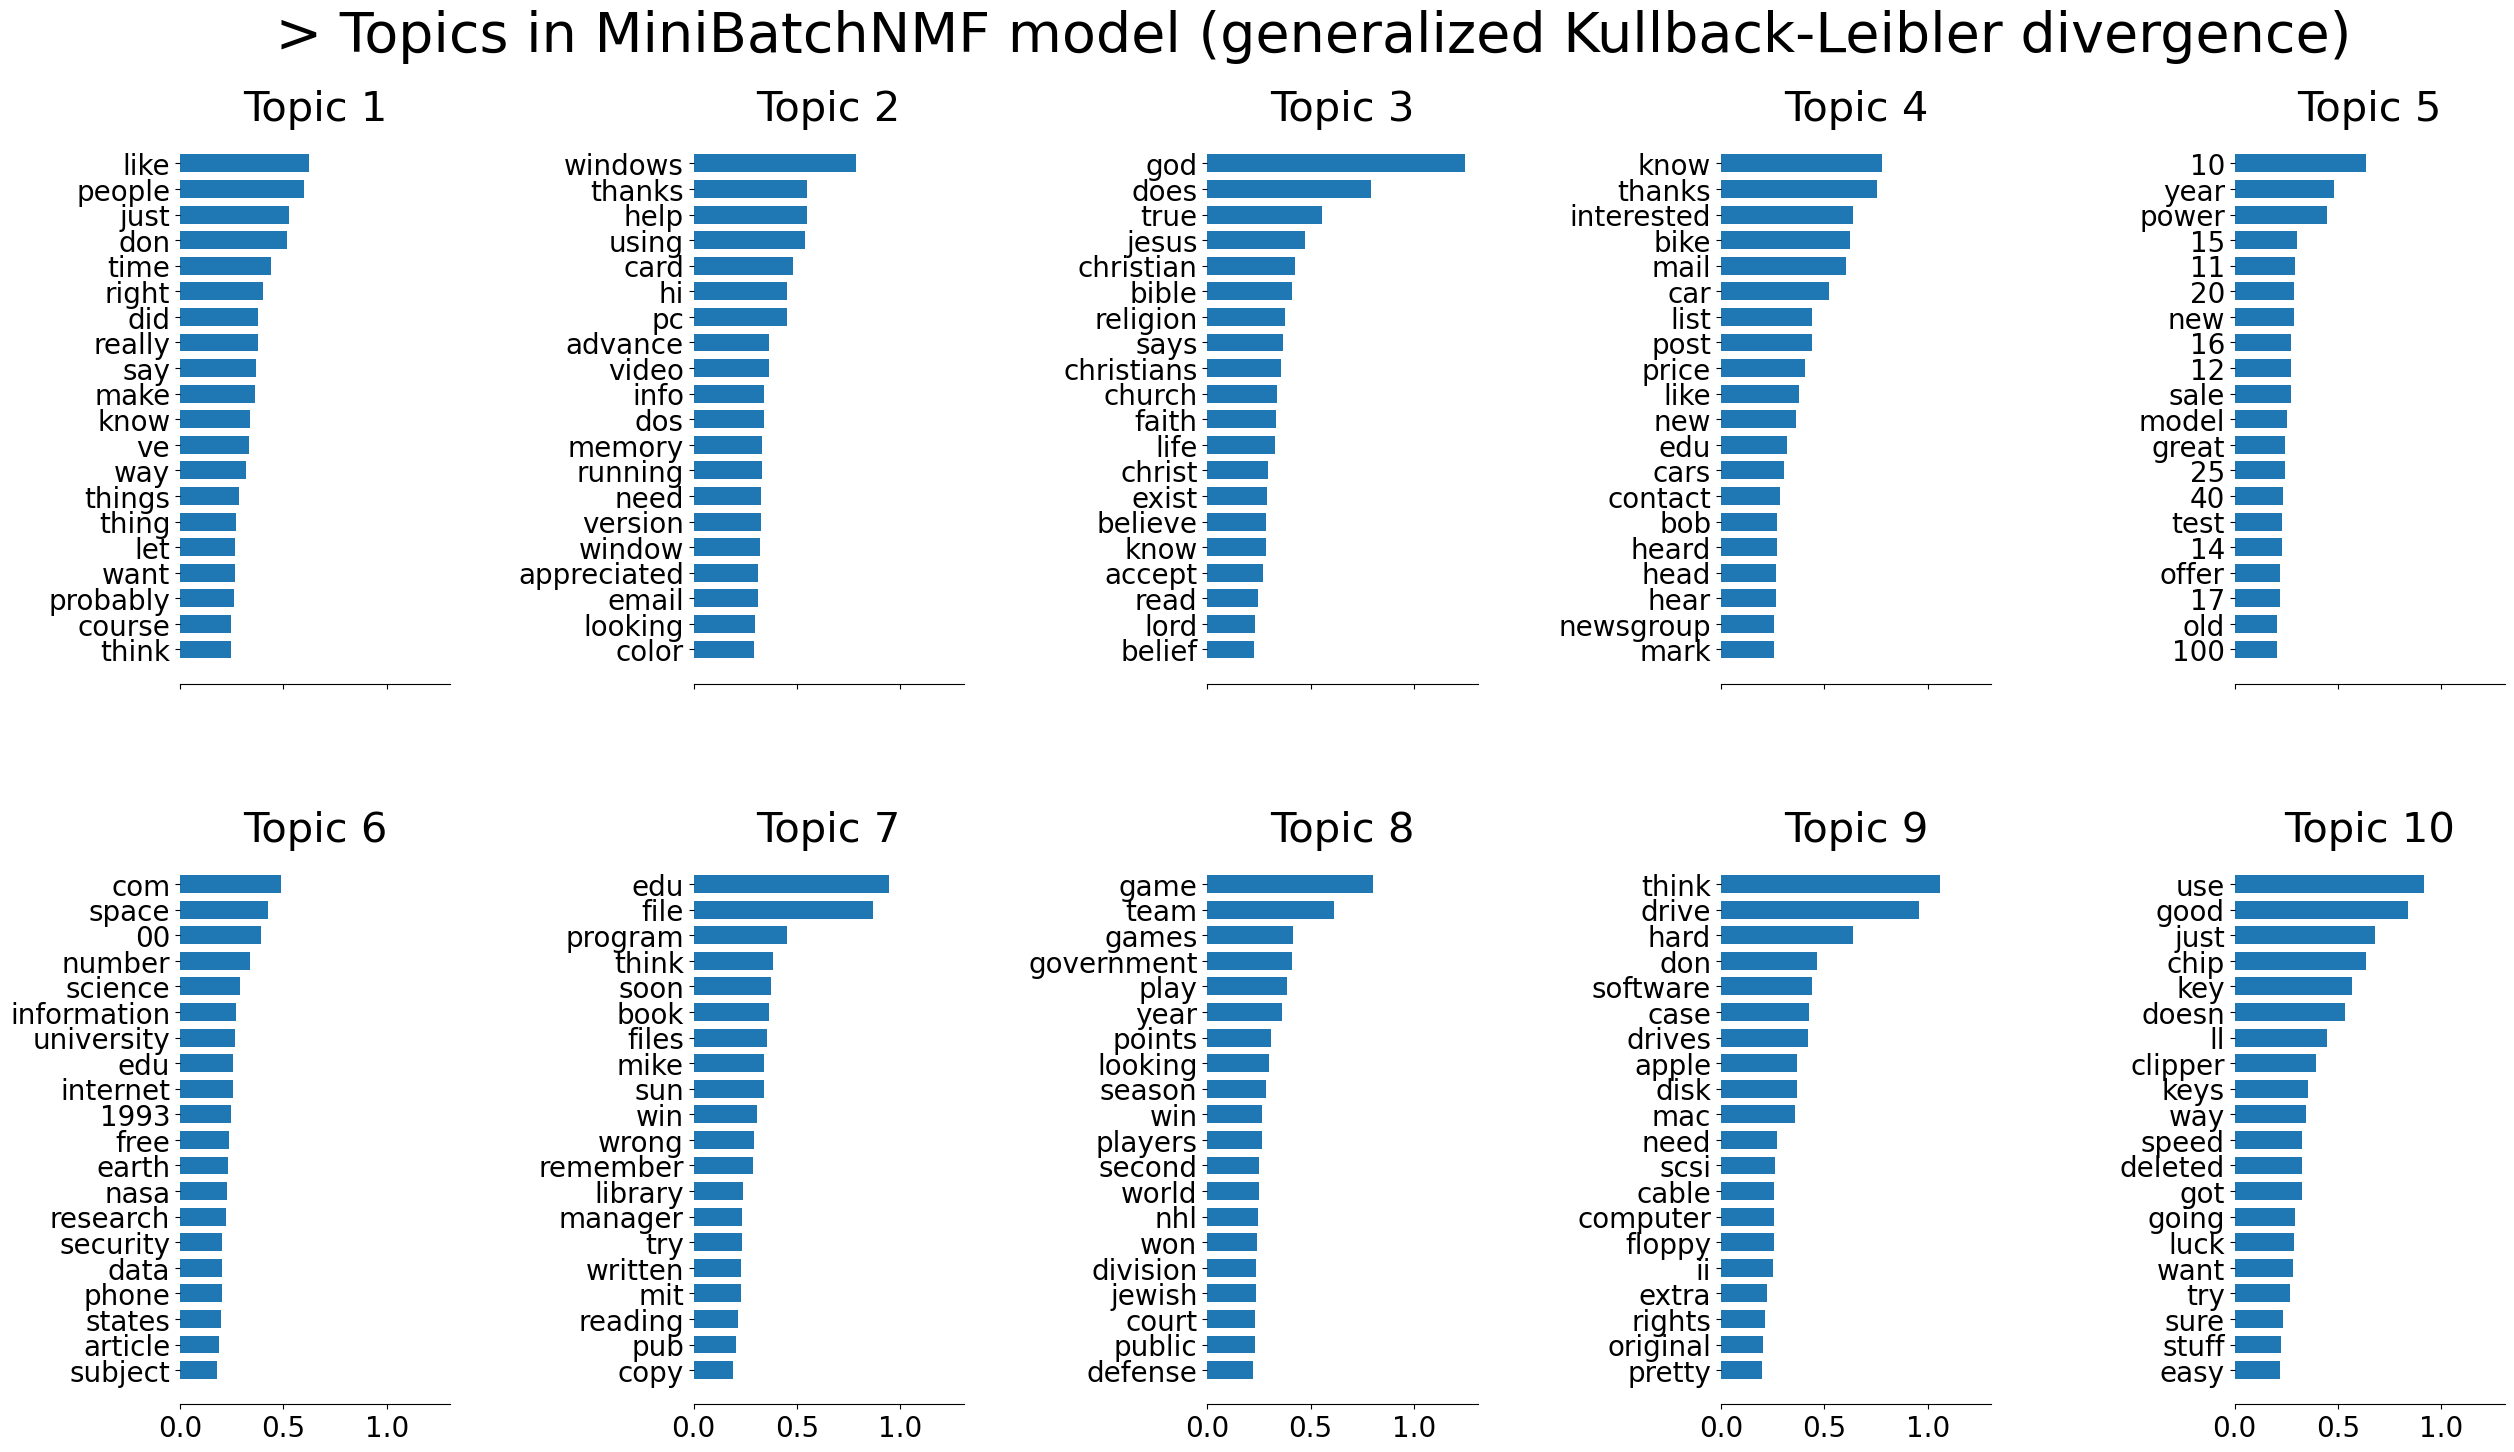

In [40]:

display(

    ' > Fitting the MiniBatchNMF model (generalized Kullback-Leibler '
    'divergence) with tf-idf features, n_samples=%d and n_features=%d, '
    'batch_size=%d...' % (n_samples, n_features, batch_size)
    
)

t0 = time()

mbnmf = MiniBatchNMF(
    
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss='kullback-leibler',
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio 0.5
    
).fit(tfidf)

display(' > Done in %0.3fs.' % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# display plots
plot_top_words(
    
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    ' > Topics in MiniBatchNMF model (generalized Kullback-Leibler divergence)'
    
)



## Fit LDA model



 > Fitting LDA model with tf features, n_samples=2000 and n_features=1000...


 > Done in 2.753s.



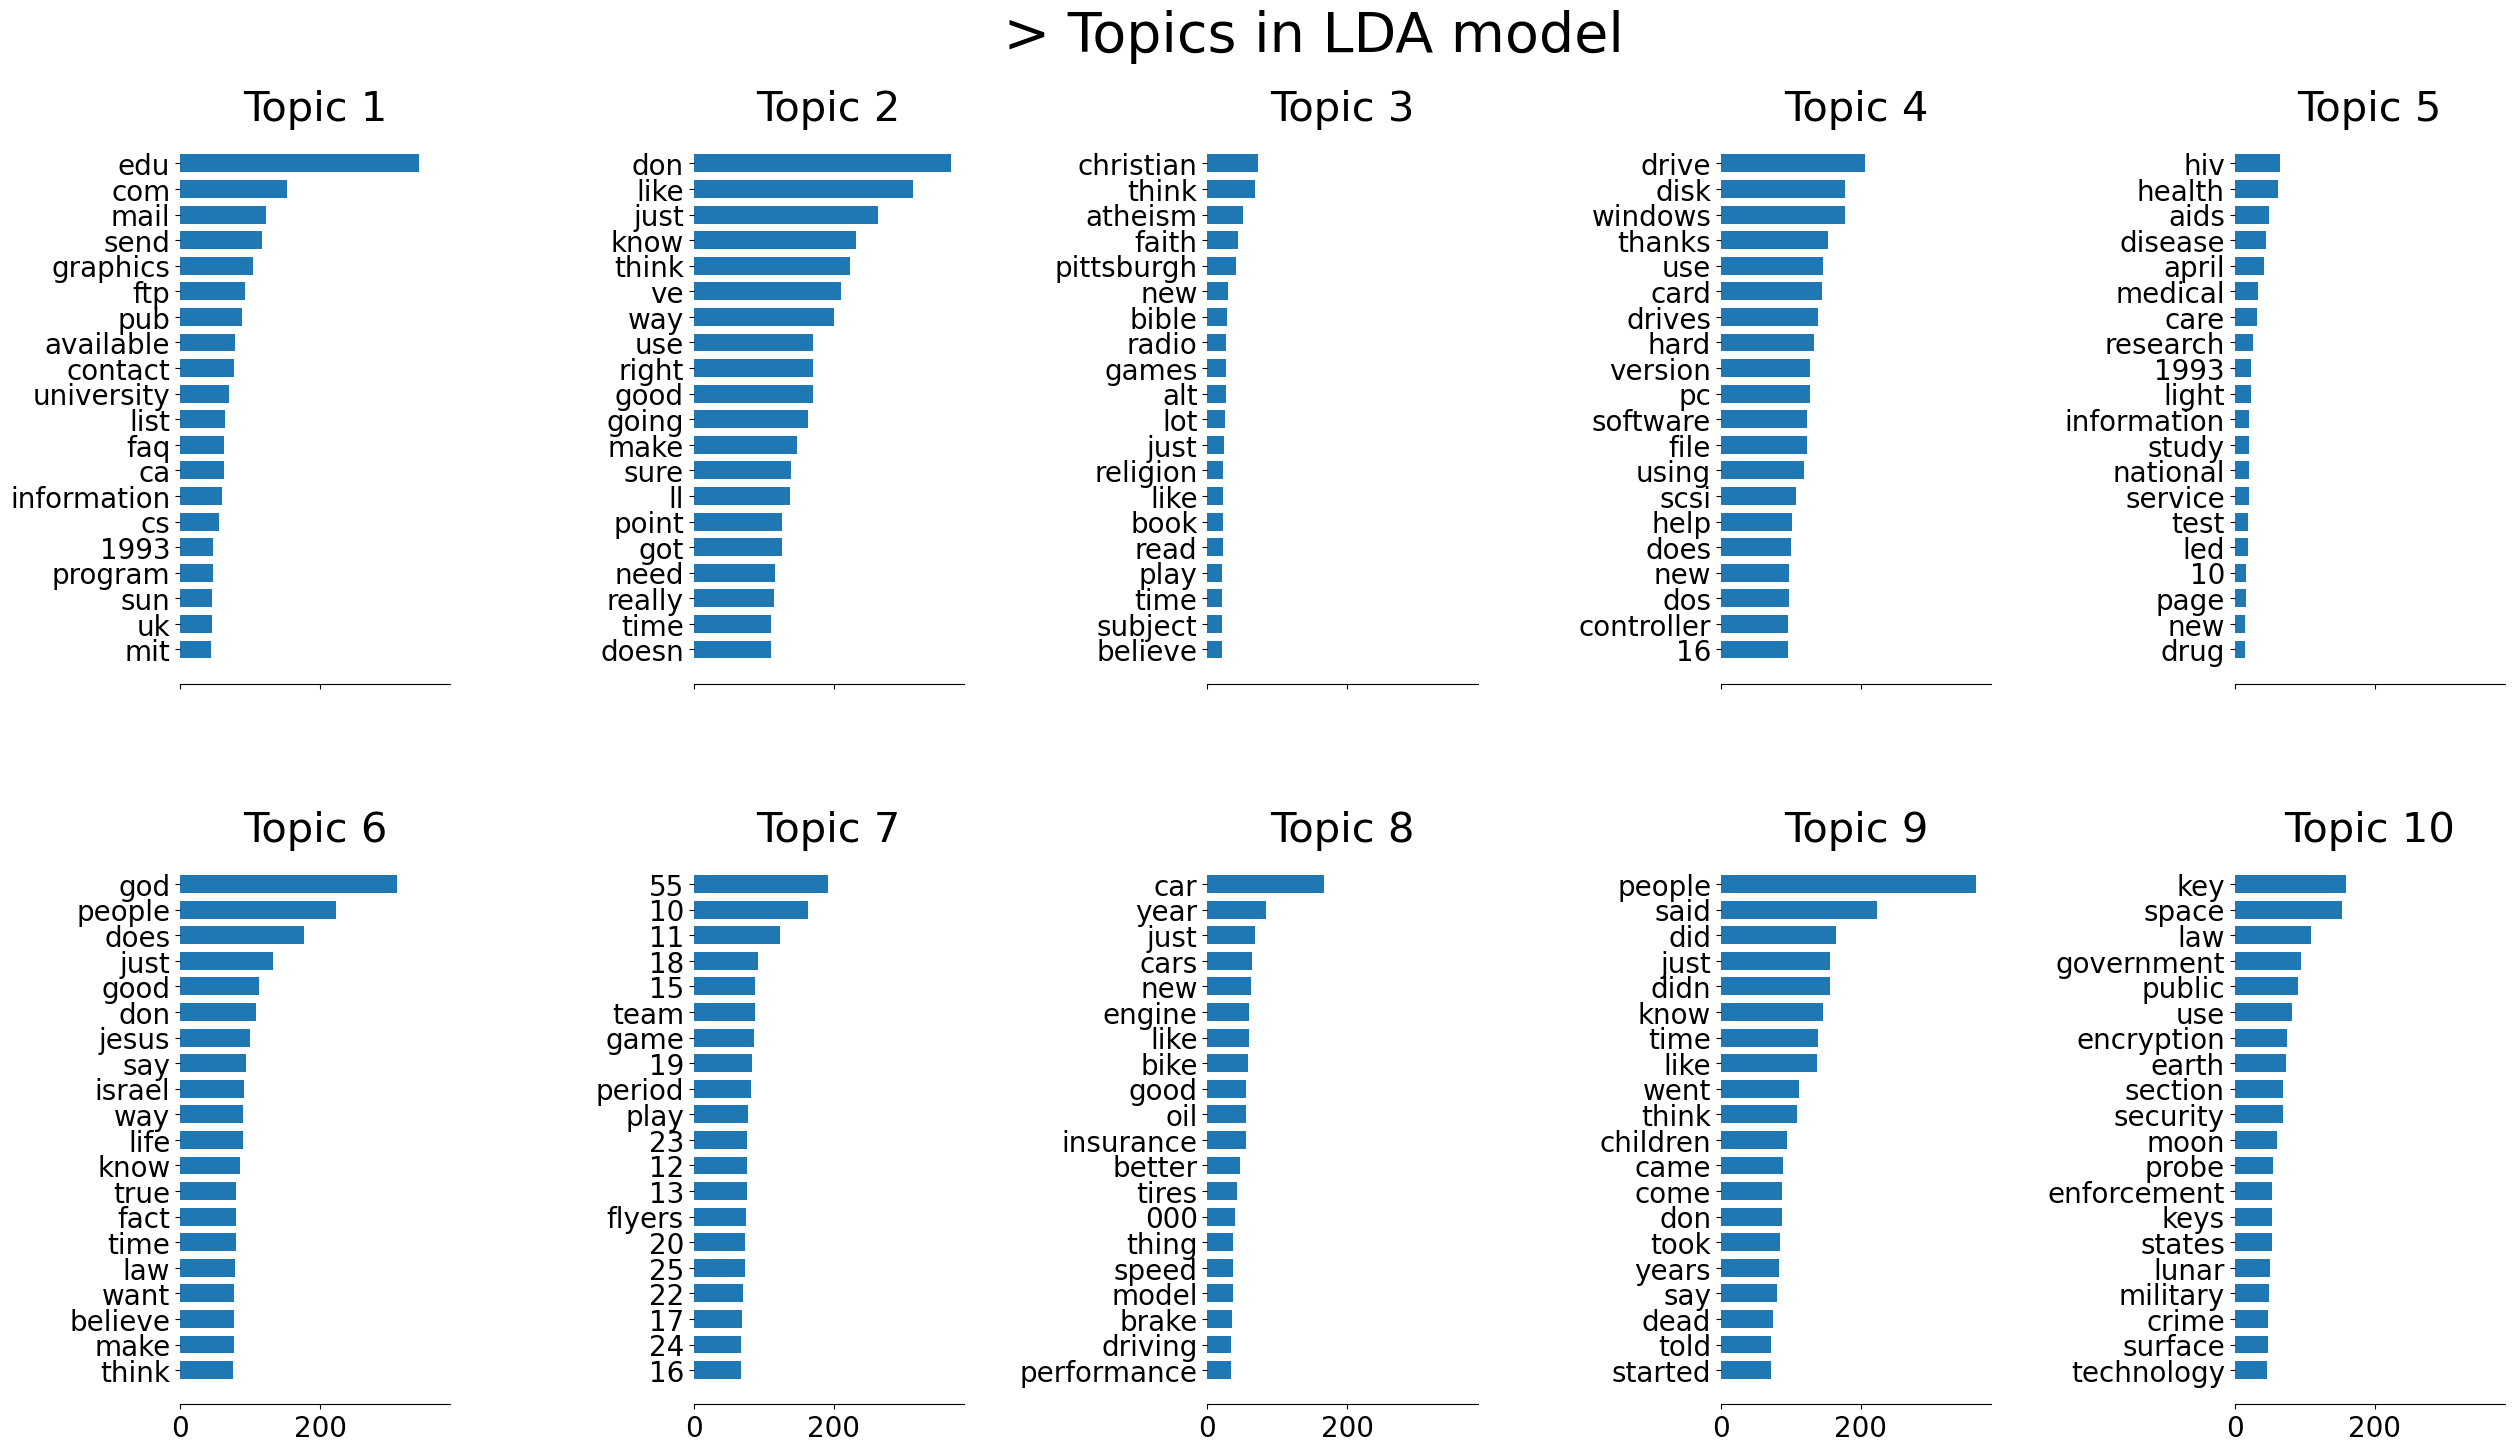

In [41]:

display(

    ' > Fitting LDA model with tf features, n_samples=%d and n_features=%d...'
    % (n_samples, n_features)
    
)

lda = LatentDirichletAllocation(
    
    n_components=n_components,
    max_iter=5,
    learning_method='online',
    learning_offset=50.0,
    random_state=0
    
)

t0 = time()

lda.fit(tf)

display(' > Done in %0.3fs.' % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()

# display plots
plot_top_words(
    
    lda, 
    tf_feature_names, 
    n_top_words, 
    ' > Topics in LDA model'

)
